# Import Data

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

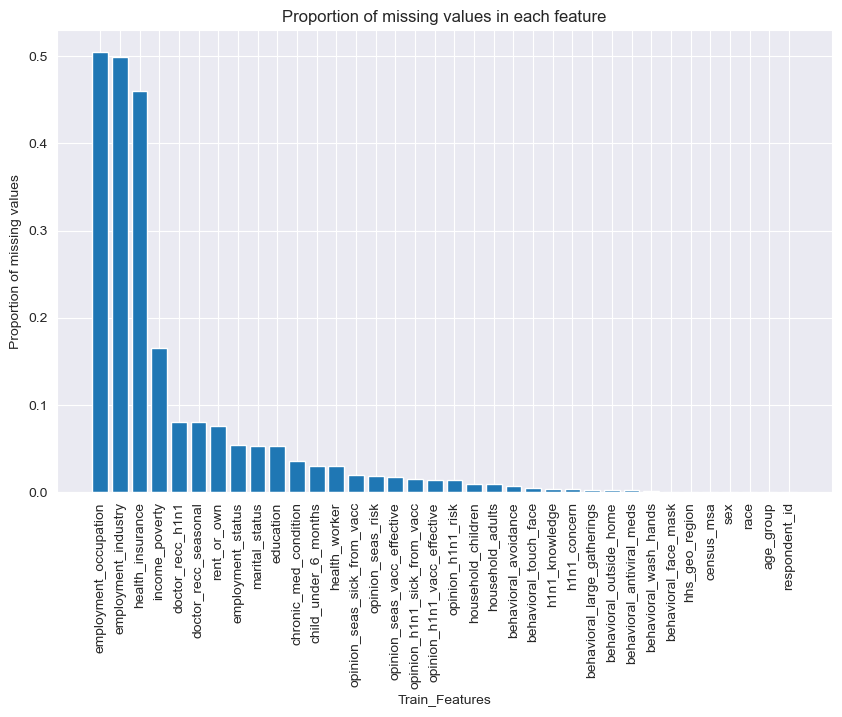

In [72]:
# Read training dataset
train_data = pd.read_csv('training_set_features.csv')
missing_train_data = train_data.isnull().mean()
missing_train_data = missing_train_data.sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.title('Proportion of missing values in each feature')
plt.xlabel('Train_Features')
plt.ylabel('Proportion of missing values')
plt.bar(missing_train_data.index, missing_train_data.values)
plt.show()

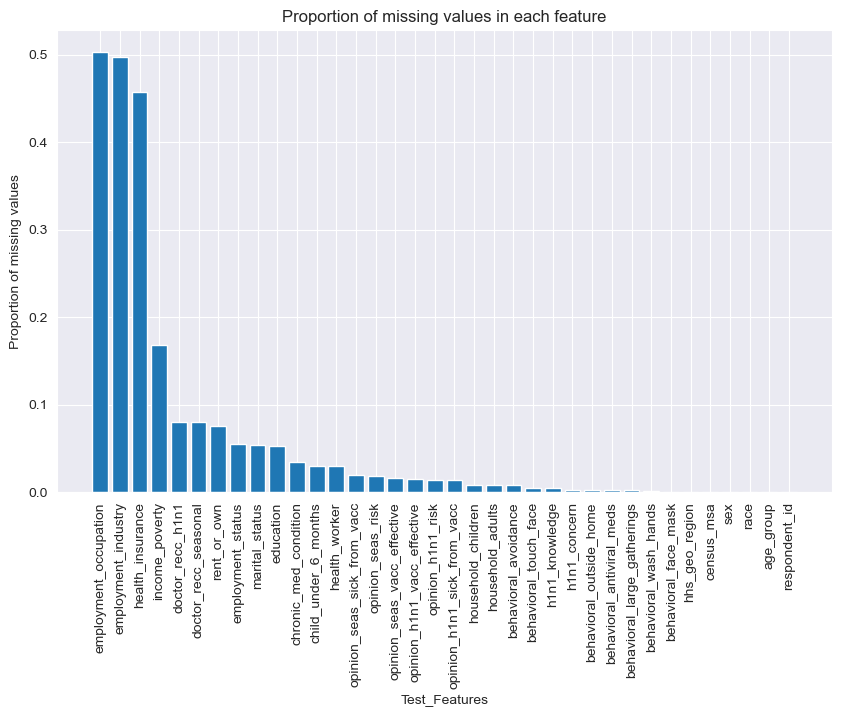

In [73]:
# Read the test dataset
test_data = pd.read_csv('test_set_features.csv')
missing_test_data = test_data.isnull().mean()
missing_test_data = missing_test_data.sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.title('Proportion of missing values in each feature')
plt.xlabel('Test_Features')
plt.ylabel('Proportion of missing values')
plt.bar(missing_test_data.index, missing_test_data.values)
plt.show()

 # Data Processing

In [74]:
# Training dataset processing
train_data = pd.read_csv('training_set_features.csv')
train_labels = pd.read_csv('training_set_labels.csv')

# Missing value handling
# Fill missing values
train_data['health_insurance'] = train_data['health_insurance'].fillna('Unknown')
train_data['employment_industry'] = train_data['employment_industry'].fillna('Unknown')
train_data['employment_occupation'] = train_data['health_insurance'].fillna('Unknown')
train_data['income_poverty'] = train_data['income_poverty'].replace({
    'Below Poverty': 1,
    '<= $75,000, Above Poverty': 2,
    '> $75,000': 3
})
median_income = train_data['income_poverty'].median()
train_data['income_poverty'] = train_data['income_poverty'].fillna(median_income)
train_data['doctor_recc_seasonal'].fillna(train_data['doctor_recc_seasonal'].mode()[0], inplace=True)
train_data['doctor_recc_h1n1'].fillna(train_data['doctor_recc_h1n1'].mode()[0], inplace=True)
freq = train_data['rent_or_own'].value_counts()
most_common = freq.index[0]
train_data['rent_or_own'].fillna(most_common, inplace=True)
freq1 = train_data['employment_status'].value_counts()
most_common1 = freq1.index[0]
train_data['employment_status'].fillna(most_common1, inplace=True)
str_features = ['marital_status', 'education', 'chronic_med_condition', 'child_under_6_months', 'health_worker',
                'opinion_seas_sick_from_vacc', 'opinion_seas_risk', 'opinion_seas_vacc_effective',
                'opinion_h1n1_sick_from_vacc', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'household_children',
                'household_adults', 'behavioral_touch_face', 'h1n1_knowledge','employment_industry','employment_occupation']
for feature in str_features:
    mode_val = train_data[feature].mode()[0]
    train_data[feature] = train_data[feature].fillna(mode_val)

# Delete rows with missing values
drop_features = ['h1n1_concern', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_antiviral_meds',
                 'behavioral_antiviral_meds', 'behavioral_face_mask', 'behavioral_avoidance', 'behavioral_wash_hands']
train_data = train_data.dropna(subset=drop_features)

# One-hot
cat_columns = ['health_insurance', 'age_group', 'education', 'race', 'sex', 'marital_status', 'employment_status',
               'rent_or_own', 'census_msa', 'hhs_geo_region','employment_industry','employment_occupation']
onehot_train_data = pd.get_dummies(train_data[cat_columns])
new_train_features = pd.concat([train_data.drop(cat_columns, axis=1), onehot_train_data], axis=1)

new_train_all_data = new_train_features.merge(train_labels, on='respondent_id')
train_features = new_train_all_data.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
train_labels = new_train_all_data[['h1n1_vaccine', 'seasonal_vaccine']]


In [75]:
# Test dataset processing
test_data =pd.read_csv('test_set_features.csv')

# Missing value handling
# Fill missing values
test_data['health_insurance'] = test_data['health_insurance'].fillna('Unknown')
test_data['employment_industry'] = test_data['employment_industry'].fillna('Unknown')
test_data['employment_occupation'] = test_data['health_insurance'].fillna('Unknown')
test_data['income_poverty'] = test_data['income_poverty'].replace({
    'Below Poverty': 1,
    '<= $75,000, Above Poverty': 2,
    '> $75,000': 3
})
median_income = test_data['income_poverty'].median()
test_data['income_poverty'] = test_data['income_poverty'].fillna(median_income)
test_data['doctor_recc_seasonal'].fillna(test_data['doctor_recc_seasonal'].mode()[0], inplace=True)
test_data['doctor_recc_h1n1'].fillna(test_data['doctor_recc_h1n1'].mode()[0], inplace=True)
freq = test_data['rent_or_own'].value_counts()
most_common = freq.index[0]
test_data['rent_or_own'].fillna(most_common, inplace=True)
freq1 = test_data['employment_status'].value_counts()
most_common1 = freq1.index[0]
test_data['employment_status'].fillna(most_common1, inplace=True)
str_features = ['marital_status', 'education', 'chronic_med_condition', 'child_under_6_months', 'health_worker',
                'opinion_seas_sick_from_vacc', 'opinion_seas_risk', 'opinion_seas_vacc_effective',
                'opinion_h1n1_sick_from_vacc', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'household_children',
                'household_adults', 'behavioral_touch_face', 'h1n1_knowledge','employment_industry','employment_occupation',
                'h1n1_concern', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_antiviral_meds',
                'behavioral_antiviral_meds', 'behavioral_face_mask', 'behavioral_avoidance', 'behavioral_wash_hands'
                ]
for feature in str_features:
    mode_val = test_data[feature].mode()[0]
    test_data[feature] = test_data[feature].fillna(mode_val)

# One-hot
cat_columns = ['health_insurance', 'age_group', 'education', 'race', 'sex', 'marital_status', 'employment_status',
               'rent_or_own', 'census_msa', 'hhs_geo_region','employment_industry','employment_occupation']
onehot_test_data = pd.get_dummies(test_data[cat_columns])
new_test_data = pd.concat([test_data.drop(cat_columns, axis=1), onehot_test_data], axis=1)


In [76]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on the training data and transform the training data
train_features_scaled = pd.DataFrame(scaler.fit_transform(train_features), columns=train_features.columns)

# Replace the old train_features with the new scaled train_features
train_features = train_features_scaled

In [77]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on the training data and transform the training data
new_test_data_scaled  = pd.DataFrame(scaler.fit_transform(new_test_data), columns=new_test_data.columns)

# Replace the old train_features with the new scaled train_features
new_test_data= new_test_data_scaled

# Model Training

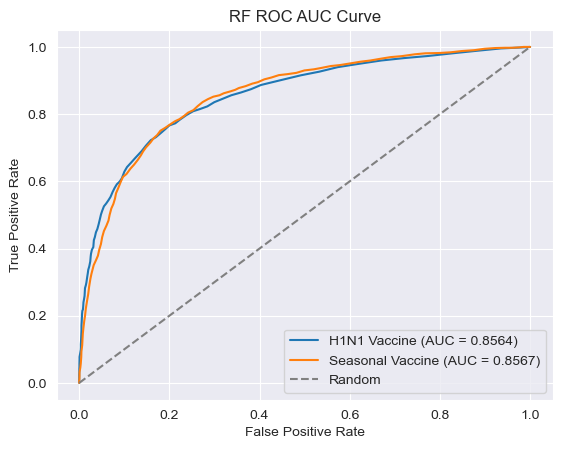

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

#Split into feature data and label data
y_h1n1 = train_labels['h1n1_vaccine']
y_seasonal = train_labels['seasonal_vaccine']

X_train, X_val, y_h1n1_train, y_h1n1_val, y_seasonal_train, y_seasonal_val = train_test_split(train_features, y_h1n1, y_seasonal, test_size=0.2, random_state=42)

tree_h1n1 = RandomForestClassifier()
tree_seasonal = RandomForestClassifier()

# Train the model
tree_h1n1.fit(X_train, y_h1n1_train)
tree_seasonal.fit(X_train, y_seasonal_train)

y_h1n1_predict = tree_h1n1.predict_proba(X_val)[:,1]
y_seasonal_predict = tree_seasonal.predict_proba(X_val)[:,1]

fpr1, tpr1, _ = roc_curve(y_h1n1_val, y_h1n1_predict)
fpr2, tpr2, _ = roc_curve(y_seasonal_val, y_seasonal_predict)

# Compute the AUC for each category
auc1 = roc_auc_score(y_h1n1_val, y_h1n1_predict)
auc2 = roc_auc_score(y_seasonal_val, y_seasonal_predict)

# Draw the ROC curve
plt.figure()
plt.plot(fpr1, tpr1, label=f'H1N1 Vaccine (AUC = {auc1:.4f})')
plt.plot(fpr2, tpr2, label=f'Seasonal Vaccine (AUC = {auc2:.4f})')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter combinations to try
param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [100, 200, 300]
}

# Initialize the GridSearchCV object with random_state set
grid_h1n1 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_seasonal = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)

grid_h1n1.fit(X_train, y_h1n1_train)
grid_seasonal.fit(X_train, y_seasonal_train)

# Output the best parameters
print("Best parameters for h1n1 data: ", grid_h1n1.best_params_)
print("Best parameters for seasonal data: ", grid_seasonal.best_params_)

Best parameters for h1n1 data:  {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 300}
Best parameters for seasonal data:  {'max_depth': 15, 'min_samples_leaf': 3, 'n_estimators': 300}


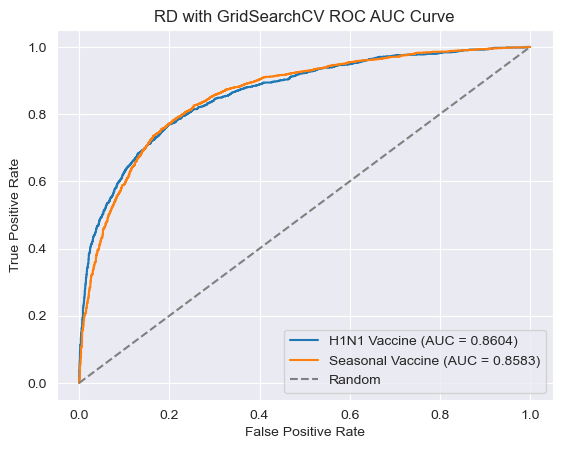

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt


y_h1n1 = train_labels['h1n1_vaccine']
y_seasonal = train_labels['seasonal_vaccine']

X_train, X_val, y_h1n1_train, y_h1n1_val, y_seasonal_train, y_seasonal_val = train_test_split(train_features, y_h1n1, y_seasonal, test_size=0.2, random_state=42)

tree_h1n1 = RandomForestClassifier(max_depth = 15,min_samples_leaf = 1,n_estimators = 300)
tree_seasonal = RandomForestClassifier(max_depth = 15,min_samples_leaf = 1,n_estimators = 300)

# Train the model
tree_h1n1.fit(X_train, y_h1n1_train)
tree_seasonal.fit(X_train, y_seasonal_train)

y_h1n1_predict = tree_h1n1.predict_proba(X_val)[:,1]
y_seasonal_predict = tree_seasonal.predict_proba(X_val)[:,1]

fpr1, tpr1, _ = roc_curve(y_h1n1_val, y_h1n1_predict)
fpr2, tpr2, _ = roc_curve(y_seasonal_val, y_seasonal_predict)

# Compute the AUC for each category
auc1 = roc_auc_score(y_h1n1_val, y_h1n1_predict)
auc2 = roc_auc_score(y_seasonal_val, y_seasonal_predict)

# Draw the ROC curve
plt.figure()
plt.plot(fpr1, tpr1, label=f'H1N1 Vaccine (AUC = {auc1:.4f})')
plt.plot(fpr2, tpr2, label=f'Seasonal Vaccine (AUC = {auc2:.4f})')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RD with GridSearchCV ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()


# Model Prediction

In [81]:
X_test_all = new_test_data
y_h1n1_predict = tree_h1n1.predict_proba(X_test_all)[:,1]
y_seasonal_predict = tree_seasonal.predict_proba(X_test_all)[:,1]
results = pd.DataFrame({'respondent_id': X_test_all['respondent_id'], 'h1n1_vaccine': y_h1n1_predict , 'seasonal_vaccine': y_seasonal_predict})
# Save as csv file
results.to_csv('result/predictions_RF_ALL_F_pyz.csv', index=False)

# Ablation experiment

In [82]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Define an ablation experiment
def ablation_experiment_v2(feature_groups, train_features, train_labels, model,k):
    best_auc_h1n1 = 0
    best_auc_seasonal = 0
    best_h1n1_model = None
    best_seasonal_model = None

    # Create a figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, (group_name, feature_group) in enumerate(feature_groups.items()):
        print(f'Performing ablation experiment by excluding {group_name}...')

        # Remove the feature group from training data
        features_to_remove = feature_group
        features_filtered = train_features.drop(features_to_remove, axis=1)

        # Initialize cross-validation
        skf = StratifiedKFold(n_splits=k, random_state=42, shuffle=True)

        for target_label, color in zip(['h1n1_vaccine', 'seasonal_vaccine'], ['b', 'r']):
            print(f'Training and evaluating model for {target_label}...')
            aucs = []

            for train_index, val_index in skf.split(features_filtered, train_labels[target_label]):
                X_train, X_val = features_filtered.iloc[train_index], features_filtered.iloc[val_index]
                y_train, y_val = train_labels[target_label].iloc[train_index], train_labels[target_label].iloc[val_index]

                # Train the model
                model.fit(X_train, y_train)

                # Predict probabilities
                probabilities = model.predict_proba(X_val)

                # Compute ROC curve and ROC area
                fpr, tpr, _ = roc_curve(y_val, probabilities[:, 1])
                roc_auc = auc(fpr, tpr)
                aucs.append(roc_auc)

            mean_auc = np.mean(aucs)
            print(f'Average ROC AUC score for {target_label}: {mean_auc:.3f}')

            # Update the best model if current model is better
            if target_label == 'h1n1_vaccine' and mean_auc > best_auc_h1n1:
                best_auc_h1n1 = mean_auc
                best_h1n1_model = model
            elif target_label == 'seasonal_vaccine' and mean_auc > best_auc_seasonal:
                best_auc_seasonal = mean_auc
                best_seasonal_model = model

            # Set the current subplot to be the active one
            plt.sca(axes[i])

            # Plot ROC curve
            plt.plot(fpr, tpr, color=color, lw=2, label=f'ROC curve for {target_label} (area = {roc_auc:.3f})')

        # Plot settings
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve\nExcluding {group_name}')
        plt.legend(loc="lower right")

    # Show the plot
    plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure.
    plt.show()

    return best_h1n1_model, best_seasonal_model


In [83]:
# Respondents' personal backgrounds
personal_backgrounds = [
    'respondent_id',
    'age_group',
    'education',
    'race',
    'sex',
    'income_poverty',
    'marital_status',
    'rent_or_own',
    'employment_status',
    'hhs_geo_region',
    'census_msa',
    'household_adults',
    'household_children',
    'employment_industry',
    'employment_occupation',
    'health_worker',
    'health_insurance',
    'chronic_med_condition',
    'child_under_6_months'
]

# Respondents' perceptions of vaccines
perceptions_of_vaccines = [
    'h1n1_concern',
    'h1n1_knowledge',
    'doctor_recc_h1n1',
    'doctor_recc_seasonal',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc'
]

# Respondents' daily behaviors
daily_behaviors = [
    'behavioral_antiviral_meds',
    'behavioral_avoidance',
    'behavioral_face_mask',
    'behavioral_wash_hands',
    'behavioral_large_gatherings',
    'behavioral_outside_home',
    'behavioral_touch_face'
]

Performing ablation experiment by excluding Respondents' personal backgrounds...
Training and evaluating model for h1n1_vaccine...
Average ROC AUC score for h1n1_vaccine: 0.825
Training and evaluating model for seasonal_vaccine...
Average ROC AUC score for seasonal_vaccine: 0.825
Performing ablation experiment by excluding Respondents' perceptions of vaccines...
Training and evaluating model for h1n1_vaccine...
Average ROC AUC score for h1n1_vaccine: 0.743
Training and evaluating model for seasonal_vaccine...
Average ROC AUC score for seasonal_vaccine: 0.735
Performing ablation experiment by excluding Respondents' daily behaviors...
Training and evaluating model for h1n1_vaccine...
Average ROC AUC score for h1n1_vaccine: 0.862
Training and evaluating model for seasonal_vaccine...
Average ROC AUC score for seasonal_vaccine: 0.858


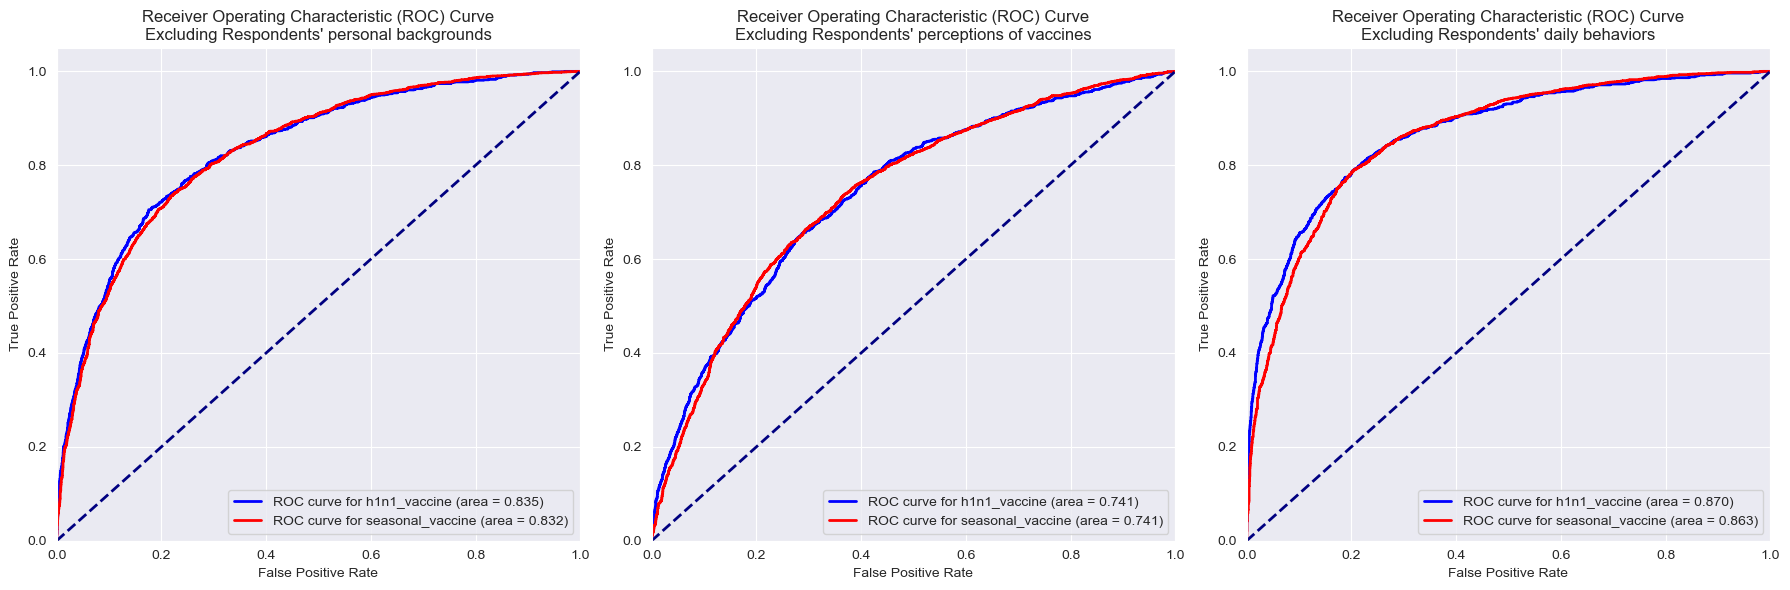

In [84]:
# One-hot encoded columns
onehot_columns = onehot_train_data.columns.tolist()

# Replace the one-hot encoded features in the original feature list with the encoded columns
personal_backgrounds = [col for col in personal_backgrounds if col not in cat_columns] + [col for col in onehot_columns if col.startswith(tuple(personal_backgrounds))]
perceptions_of_vaccines = [col for col in perceptions_of_vaccines if col not in cat_columns] + [col for col in onehot_columns if col.startswith(tuple(perceptions_of_vaccines))]
daily_behaviors = [col for col in daily_behaviors if col not in cat_columns] + [col for col in onehot_columns if col.startswith(tuple(daily_behaviors))]

feature_groups = {
    "Respondents' personal backgrounds": personal_backgrounds,
    "Respondents' perceptions of vaccines": perceptions_of_vaccines,
    "Respondents' daily behaviors": daily_behaviors
}
# Invoke the ablation experiment method
model1 = RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=300, random_state=42)
best_h1n1_model, best_seasonal_model = ablation_experiment_v2(feature_groups, train_features, train_labels, model1, 5)

Performing ablation experiment by excluding Respondents' personal backgrounds...
Training and evaluating model for h1n1_vaccine...
Average ROC AUC score for h1n1_vaccine: 0.810
Training and evaluating model for seasonal_vaccine...
Average ROC AUC score for seasonal_vaccine: 0.808
Performing ablation experiment by excluding Respondents' perceptions of vaccines...
Training and evaluating model for h1n1_vaccine...
Average ROC AUC score for h1n1_vaccine: 0.722
Training and evaluating model for seasonal_vaccine...
Average ROC AUC score for seasonal_vaccine: 0.710
Performing ablation experiment by excluding Respondents' daily behaviors...
Training and evaluating model for h1n1_vaccine...
Average ROC AUC score for h1n1_vaccine: 0.817
Training and evaluating model for seasonal_vaccine...
Average ROC AUC score for seasonal_vaccine: 0.795


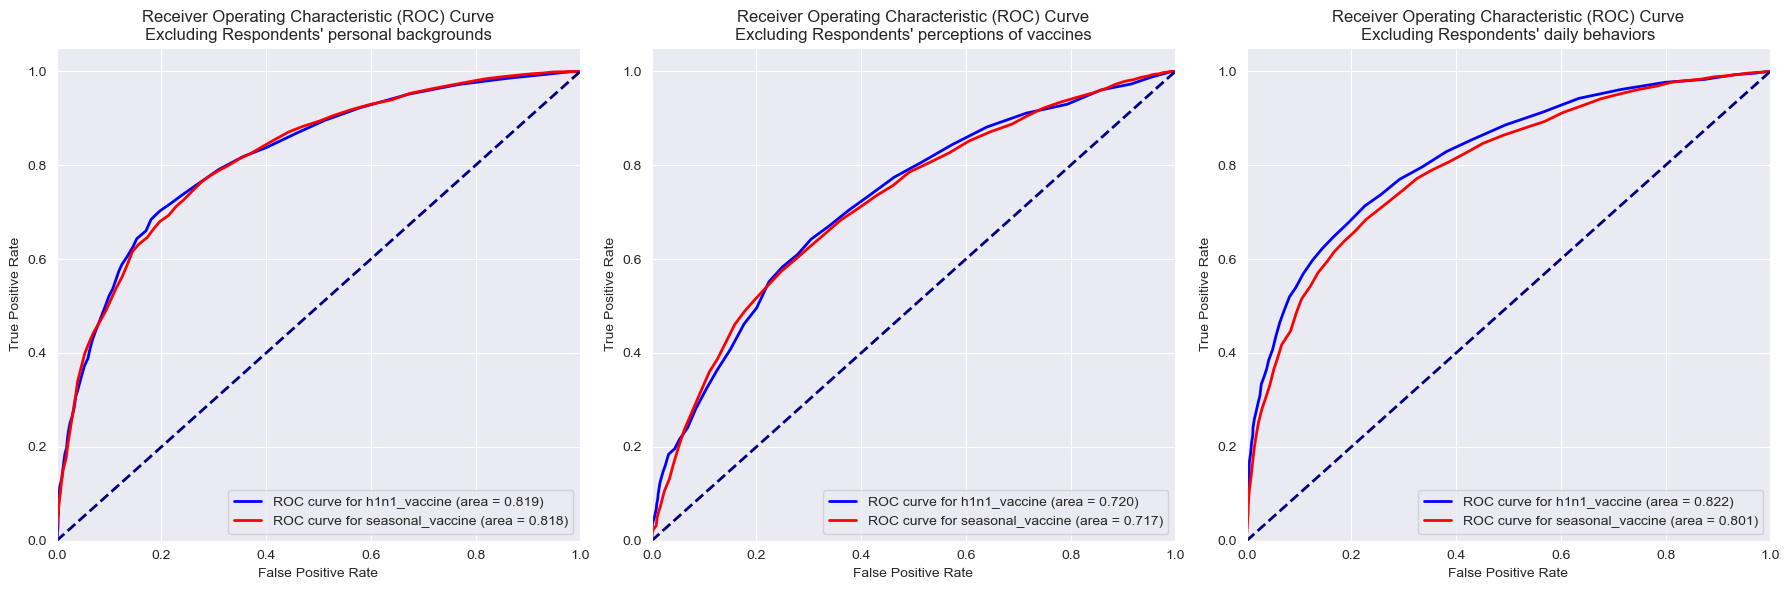

In [95]:
model2 = KNeighborsClassifier(n_neighbors=67)
best_h1n1_model2, best_seasonal_model2 = ablation_experiment_v2(feature_groups, train_features, train_labels, model2, 5)


# Best model predictions

In [86]:
X_test_AE = new_test_data.drop(daily_behaviors, axis =1)
y_h1n1_predict_AE = best_h1n1_model.predict_proba(X_test_AE)[:,1]
y_seasonal_predict_AE = best_seasonal_model.predict_proba(X_test_AE)[:,1]
results = pd.DataFrame({'respondent_id': X_test_AE['respondent_id'], 'h1n1_vaccine': y_h1n1_predict_AE , 'seasonal_vaccine': y_seasonal_predict_AE})
# Output the result as csv file
results.to_csv('result/predictions_ablation_experiment_pyz.csv', index=False)